# Global Equities Momentum (GEM)

Gary Antonacci’s Dual Momentum approach is simple: by combining both relative momentum and absolute momentum (i.e. trend following), Dual Momentum seeks to rotate into areas of relative strength while preserving the flexibility to shift entirely to safety assets (e.g. short-term U.S. Treasury bills) during periods of pervasive, negative trends.

https://blog.thinknewfound.com/2019/01/fragility-case-study-dual-momentum-gem/  
https://seekingalpha.com/article/4010394-prospecting-dual-momentum-gem


![](GEM-rules2.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbols = {'SP500' : 'IVV',  'BONDS' : 'BND', 'EXUS' : 'VEU'}
symbols = {'SP500' : 'SPY',  'BONDS' : 'AGG', 'EXUS' : 'EFA'}

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2020, 1, 1)
# num months lookback
lookback = 12

use_cache = False

Run Strategy

In [4]:
s = strategy.Strategy(symbols, capital, start, end, lookback=lookback, margin=1,
                      use_cache=use_cache, use_absolute_mom=True)
s.run()

Retrieve log DataFrames

In [5]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [6]:
rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2005-04-01,0,34.02,293,entry,LONG,EFA
1,2007-12-03,1,55.36,293,exit,LONG,EFA
2,2007-12-03,2,70.15,231,entry,LONG,AGG
3,2008-11-03,3,67.43,231,exit,LONG,AGG
4,2008-12-01,4,71.58,218,entry,LONG,AGG


In [7]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
29,2019-01-02,102.44,2019-03-01,103.01,0.57,123.87,217,12365.58,LONG,AGG
30,2019-03-01,272.40,2019-06-03,267.89,-4.51,-369.65,82,11995.94,LONG,SPY
31,2019-06-03,107.42,2019-11-01,111.14,3.72,758.94,204,12754.87,LONG,AGG
32,2019-11-01,301.53,2020-04-01,245.07,-56.46,-4234.71,75,8520.16,LONG,SPY
33,2020-04-01,114.07,2020-07-27,119.20,5.13,830.26,162,9350.42,LONG,AGG


In [8]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-07-21,19330.99,19330.99,19330.99,162,40.02,1.00,-
2020-07-22,19347.18,19347.18,19347.18,162,40.02,1.00,-
2020-07-23,19369.86,19369.86,19369.86,162,40.02,1.00,-
2020-07-24,19363.38,19363.38,19363.38,162,40.02,1.00,-
2020-07-27,19350.42,19350.42,19350.42,0,19350.42,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                   2005-03-04
end                                                     2020-07-27
beginning_balance                                            10000
ending_balance                                            19350.42
total_net_profit                                           9350.42
gross_profit                                              24381.43
gross_loss                                               -15031.01
profit_factor                                                 1.62
return_on_initial_capital                                    93.50
annual_return_rate                                            4.38
trading_period                           15 years 4 months 23 days
pct_time_in_market                                           99.02
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2005-03-04 00:00:00 BUY  111 SPY @ 89.93
2020-07-27 00:00:00 SELL 111 SPY @ 323.22


Plot Equity Curves: Strategy vs Benchmark

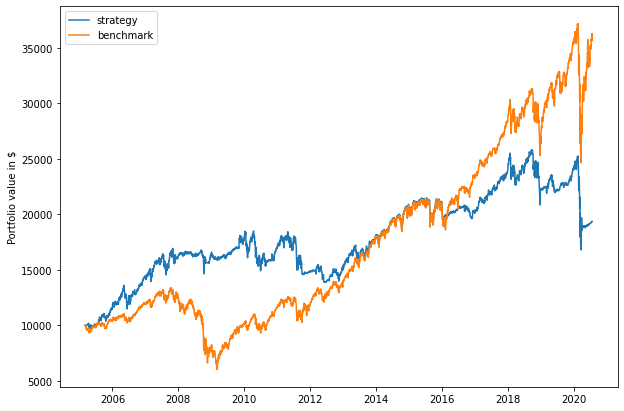

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

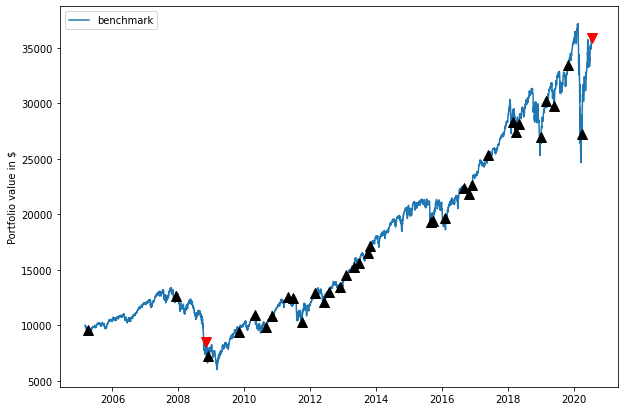

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,4.38,8.65
max_closed_out_drawdown,-34.96,-55.11
drawdown_annualized_return,-7.98,-6.37
drawdown_recovery,-1.51,-1.42
best_month,12.63,23.55
worst_month,-30.81,-30.97
sharpe_ratio,0.36,0.52
sortino_ratio,0.41,0.62
monthly_std,3.62,4.61


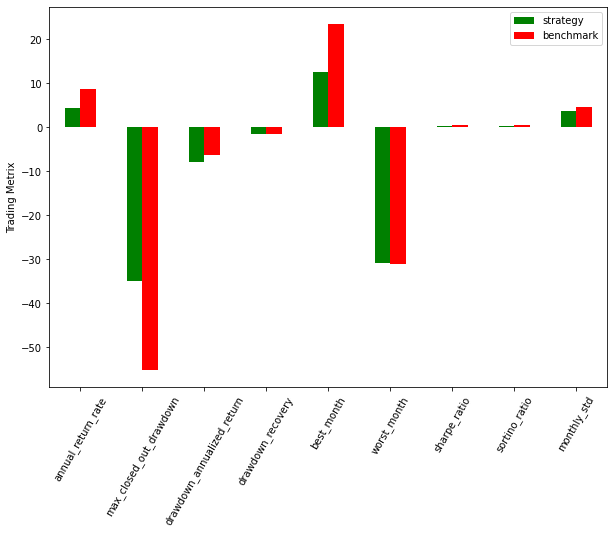

In [13]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df